In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [119]:
import nltk
import numpy as np
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize,TweetTokenizer
import re
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1. Extracting Reviews from Amazon

In [87]:
Titan_Reviews = [ ]

In [110]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Titan-Analog-Silver-Womens-Watch-2603WM01/product-reviews/B07CNTCHSX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {'class',"a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    Titan_Reviews = Titan_Reviews+op

In [111]:
Titan_Reviews

['\n\n\n\n\n\n\n\n\n\n\n  Top reviews from India\n',
 '\n\n\n\n\n\n\n\n\n\n\n  Top reviews from India\n',
 '',
 '\nQuality and lightweight watch always fan of Titian raga ⌚\n',
 '\nGood\n',
 '\nIt is very Nice,,Sooo beautiful, Light weight, gifted by my hubby😍...I am soo happy ...Thanks...\n',
 "\nFirstly the watch is light weight & smart looking & has 2 Swarovski crystals on it which makes it more attractive.... But when it is taken in the hand it feels like any 1st copy watches that are available in the market thus I feel that it is a bit overpriced than the quality of the product.... After using only it'll be possible to say about the battery & colour longevity.... Otherwise it is a pretty decent watch! One can keep an option of buying it! :)\n",
 '\nImage says gray but received black. Other than this evening nice\n',
 "\nThis watch OMG can't describe how much I loved it 😍😍 Simple yet elegant.. I thought it would be too big for my wrist but surprisingly it fits n I just loved it ❤ n

In [112]:
len(Titan_Reviews)

193

In [115]:
Titan_Reviews = Titan_Reviews[3:]

In [173]:
Titan_Reviews

['\nQuality and lightweight watch always fan of Titian raga ⌚\n',
 '\nGood\n',
 '\nIt is very Nice,,Sooo beautiful, Light weight, gifted by my hubby😍...I am soo happy ...Thanks...\n',
 "\nFirstly the watch is light weight & smart looking & has 2 Swarovski crystals on it which makes it more attractive.... But when it is taken in the hand it feels like any 1st copy watches that are available in the market thus I feel that it is a bit overpriced than the quality of the product.... After using only it'll be possible to say about the battery & colour longevity.... Otherwise it is a pretty decent watch! One can keep an option of buying it! :)\n",
 '\nImage says gray but received black. Other than this evening nice\n',
 "\nThis watch OMG can't describe how much I loved it 😍😍 Simple yet elegant.. I thought it would be too big for my wrist but surprisingly it fits n I just loved it ❤ n yeah am not a very big fan of other colors except silver when it comes to Watch but this one made my mind chan

In [117]:
len(Titan_Reviews)

190

In [123]:
#Cleaning the data
corpus = []

for i in range(len(Titan_Reviews)):
    txt = re.sub('[^a-zA-Z0-9]',' ',Titan_Reviews[i])
    txt = txt.lower()
    corpus.append(txt)

In [124]:
corpus

[' quality and lightweight watch always fan of titian raga   ',
 ' good ',
 ' it is very nice  sooo beautiful  light weight  gifted by my hubby    i am soo happy    thanks    ',
 ' firstly the watch is light weight   smart looking   has 2 swarovski crystals on it which makes it more attractive     but when it is taken in the hand it feels like any 1st copy watches that are available in the market thus i feel that it is a bit overpriced than the quality of the product     after using only it ll be possible to say about the battery   colour longevity     otherwise it is a pretty decent watch  one can keep an option of buying it     ',
 ' image says gray but received black  other than this evening nice ',
 ' this watch omg can t describe how much i loved it    simple yet elegant   i thought it would be too big for my wrist but surprisingly it fits n i just loved it   n yeah am not a very big fan of other colors except silver when it comes to watch but this one made my mind change   the on

In [125]:
corpus[0]

' quality and lightweight watch always fan of titian raga   '

In [126]:
#Lemmitization
lemma = WordNetLemmatizer()

In [127]:
for i in corpus:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(lemma.lemmatize(i))

quality
lightweight
watch
always
fan
titian
raga
good
nice
sooo
beautiful
light
weight
gifted
hubby
soo
happy
thanks
firstly
watch
light
weight
smart
looking
2
swarovski
crystal
make
attractive
taken
hand
feel
like
1st
copy
watch
available
market
thus
feel
bit
overpriced
quality
product
using
possible
say
battery
colour
longevity
otherwise
pretty
decent
watch
one
keep
option
buying
image
say
gray
received
black
evening
nice
watch
omg
describe
much
loved
simple
yet
elegant
thought
would
big
wrist
surprisingly
fit
n
loved
n
yeah
big
fan
color
except
silver
come
watch
one
made
mind
change
problem
seal
stamp
warranty
card
big
deal
still
right
thing
without
seal
packing
warranty
card
thanks
amazon
amazing
product
bought
gift
mom
loved
design
detailing
spot
loved
colour
watch
although
dial
feel
could
little
sleeker
thats
subjective
delivery
spot
satisfied
waiting
watch
give
gift
wife
birthday
luckily
2
day
birthday
watch
stock
wife
really
like
watch
titan
brand
always
best
watch
nice
chain
s

watch
nice
chain
showed
pic
silver
whereas
get
black
chain
packaging
good
one
major
concern
warranty
card
stamped
know
get
warranty
look
watch
look
nice
n
elegant
hype
accordingly
price
ya
strap
black
grey
misleaded
information
picture
watch
though
watch
look
classy
even
dial
big
showing
quality
lightweight
watch
always
fan
titian
raga
good
nice
sooo
beautiful
light
weight
gifted
hubby
soo
happy
thanks
firstly
watch
light
weight
smart
looking
2
swarovski
crystal
make
attractive
taken
hand
feel
like
1st
copy
watch
available
market
thus
feel
bit
overpriced
quality
product
using
possible
say
battery
colour
longevity
otherwise
pretty
decent
watch
one
keep
option
buying
image
say
gray
received
black
evening
nice
watch
omg
describe
much
loved
simple
yet
elegant
thought
would
big
wrist
surprisingly
fit
n
loved
n
yeah
big
fan
color
except
silver
come
watch
one
made
mind
change
problem
seal
stamp
warranty
card
big
deal
still
right
thing
without
seal
packing
warranty
card
thanks
amazon
amazing
p

thing
without
seal
packing
warranty
card
thanks
amazon
amazing
product
bought
gift
mom
loved
design
detailing
spot
loved
colour
watch
although
dial
feel
could
little
sleeker
thats
subjective
delivery
spot
satisfied
waiting
watch
give
gift
wife
birthday
luckily
2
day
birthday
watch
stock
wife
really
like
watch
titan
brand
always
best
watch
nice
chain
showed
pic
silver
whereas
get
black
chain
packaging
good
one
major
concern
warranty
card
stamped
know
get
warranty
look
watch
look
nice
n
elegant
hype
accordingly
price
ya
strap
black
grey
misleaded
information
picture
watch
though
watch
look
classy
even
dial
big
showing
quality
lightweight
watch
always
fan
titian
raga
good
nice
sooo
beautiful
light
weight
gifted
hubby
soo
happy
thanks
firstly
watch
light
weight
smart
looking
2
swarovski
crystal
make
attractive
taken
hand
feel
like
1st
copy
watch
available
market
thus
feel
bit
overpriced
quality
product
using
possible
say
battery
colour
longevity
otherwise
pretty
decent
watch
one
keep
optio

In [128]:
cleaned_reviews = ' '.join(corpus)
cleaned_reviews

' quality and lightweight watch always fan of titian raga     good   it is very nice  sooo beautiful  light weight  gifted by my hubby    i am soo happy    thanks      firstly the watch is light weight   smart looking   has 2 swarovski crystals on it which makes it more attractive     but when it is taken in the hand it feels like any 1st copy watches that are available in the market thus i feel that it is a bit overpriced than the quality of the product     after using only it ll be possible to say about the battery   colour longevity     otherwise it is a pretty decent watch  one can keep an option of buying it       image says gray but received black  other than this evening nice   this watch omg can t describe how much i loved it    simple yet elegant   i thought it would be too big for my wrist but surprisingly it fits n i just loved it   n yeah am not a very big fan of other colors except silver when it comes to watch but this one made my mind change   the only problem is there i

## Feature Extraction

In [129]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [130]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x

<190x198 sparse matrix of type '<class 'numpy.int64'>'
	with 5605 stored elements in Compressed Sparse Row format>

In [131]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [132]:
cv.get_feature_names_out()

array(['1st', 'about', 'accordingly', 'after', 'although', 'always', 'am',
       'amazing', 'amazon', 'an', 'and', 'any', 'are', 'as', 'attractive',
       'available', 'battery', 'be', 'beautiful', 'been', 'before',
       'best', 'big', 'birthday', 'bit', 'black', 'bought', 'brand',
       'but', 'buying', 'by', 'can', 'card', 'chain', 'change', 'classy',
       'colors', 'colour', 'comes', 'concern', 'copy', 'could',
       'crystals', 'days', 'deal', 'decent', 'delivery', 'describe',
       'design', 'detailing', 'dial', 'don', 'elegant', 'even', 'evening',
       'except', 'fan', 'feel', 'feels', 'firstly', 'fits', 'for', 'get',
       'gift', 'gifted', 'give', 'good', 'gray', 'grey', 'hand', 'happy',
       'has', 'have', 'her', 'here', 'how', 'hubby', 'hype', 'image',
       'in', 'information', 'is', 'it', 'just', 'keep', 'know', 'light',
       'lightweight', 'like', 'little', 'll', 'longevity', 'look',
       'looking', 'looks', 'loved', 'luckily', 'made', 'major', 'makes',


In [133]:
cv.vocabulary_

{'quality': 129,
 'and': 10,
 'lightweight': 87,
 'watch': 181,
 'always': 5,
 'fan': 56,
 'of': 111,
 'titian': 172,
 'raga': 130,
 'good': 66,
 'it': 82,
 'is': 81,
 'very': 177,
 'nice': 108,
 'sooo': 147,
 'beautiful': 18,
 'light': 86,
 'weight': 184,
 'gifted': 64,
 'by': 30,
 'my': 107,
 'hubby': 76,
 'am': 6,
 'soo': 146,
 'happy': 70,
 'thanks': 160,
 'firstly': 59,
 'the': 163,
 'smart': 144,
 'looking': 93,
 'has': 71,
 'swarovski': 157,
 'crystals': 42,
 'on': 113,
 'which': 188,
 'makes': 99,
 'more': 105,
 'attractive': 14,
 'but': 28,
 'when': 186,
 'taken': 158,
 'in': 79,
 'hand': 69,
 'feels': 58,
 'like': 88,
 'any': 11,
 '1st': 0,
 'copy': 40,
 'watches': 182,
 'that': 161,
 'are': 12,
 'available': 15,
 'market': 100,
 'thus': 170,
 'feel': 57,
 'bit': 24,
 'overpriced': 119,
 'than': 159,
 'product': 128,
 'after': 3,
 'using': 176,
 'only': 115,
 'll': 90,
 'be': 17,
 'possible': 124,
 'to': 173,
 'say': 135,
 'about': 1,
 'battery': 16,
 'colour': 37,
 'longevit

In [134]:
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
df1

,1st,about,accordingly,after,although,always,am,amazing,amazon,an,...,which,wife,will,without,would,wrist,ya,yeah,yet,you
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0,0,0,0,0,0,1,1,1,1,...,0,0,0,1,1,1,0,1,1,0
186,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [135]:
tf = TfidfVectorizer()

x = tf.fit_transform(corpus)

df1 = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
df1

,1st,about,accordingly,after,although,always,am,amazing,amazon,an,...,which,wife,will,without,would,wrist,ya,yeah,yet,you
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.335129,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237471,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.114929,0.114929,0.000000,0.114929,0.000000,0.000000,0.000000,0.000000,0.000000,0.091360,...,0.114929,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086891,0.109307,0.109307,0.086891,...,0.000000,0.00000,0.000000,0.109307,0.109307,0.109307,0.000000,0.109307,0.109307,0.000000
186,0.000000,0.000000,0.000000,0.000000,0.160992,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187,0.000000,0.000000,0.000000,0.000000,0.000000,0.131187,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.33006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.142138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142138


## Named Entity Recognition

In [136]:
import spacy
from spacy import displacy
import pandas as pd

In [137]:
nlp  = spacy.load('en_core_web_sm')

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [138]:
doc = nlp(cleaned_reviews)

In [139]:
displacy.render(doc, style='ent')

## WordCloud

In [140]:
from wordcloud import WordCloud, STOPWORDS

In [141]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'WordCloud')

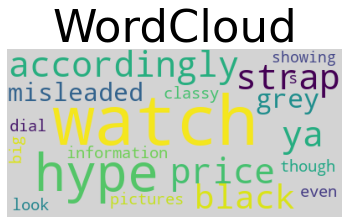

In [174]:
wordcl = WordCloud(background_color='lightgrey').generate(txt)
plt.imshow(wordcl)
plt.axis('off')
plt.title('WordCloud', size = 45)

# 2. Emotion Mining

In [143]:
afinn = pd.read_csv('Afinn.csv',sep = ',',encoding= 'Latin_1')
afinn.shape

(2477, 2)

In [144]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [145]:
corpus

[' quality and lightweight watch always fan of titian raga   ',
 ' good ',
 ' it is very nice  sooo beautiful  light weight  gifted by my hubby    i am soo happy    thanks    ',
 ' firstly the watch is light weight   smart looking   has 2 swarovski crystals on it which makes it more attractive     but when it is taken in the hand it feels like any 1st copy watches that are available in the market thus i feel that it is a bit overpriced than the quality of the product     after using only it ll be possible to say about the battery   colour longevity     otherwise it is a pretty decent watch  one can keep an option of buying it     ',
 ' image says gray but received black  other than this evening nice ',
 ' this watch omg can t describe how much i loved it    simple yet elegant   i thought it would be too big for my wrist but surprisingly it fits n i just loved it   n yeah am not a very big fan of other colors except silver when it comes to watch but this one made my mind change   the on

In [146]:
Review_df = pd.DataFrame(corpus,columns= ['Reviews'])
Review_df

,Reviews
0,quality and lightweight watch always fan of t...
1,good
2,it is very nice sooo beautiful light weight...
3,firstly the watch is light weight smart loo...
4,image says gray but received black other tha...
...,...
185,this watch omg can t describe how much i love...
186,bought this as a gift for my mom she loved i...
187,i was waiting for this watch to give gift to ...
188,the watch is nice but chain showed in pic is ...


In [147]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [159]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        Reviews = nlp(text)
        for word in Reviews:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
        return sent_score

In [160]:
Review_df['sentiment_value'] = Review_df['Reviews'].apply(calculate_sentiment)

In [161]:
Review_df['word_count'] = Review_df['Reviews'].str.split().apply(len)
Review_df['word_count'].head(10)

0     9
1     1
2    17
3    84
4    11
5    99
6    46
7    42
8    54
9    36
Name: word_count, dtype: int64

In [162]:
Review_df

,Reviews,sentiment_value,word_count
0,quality and lightweight watch always fan of t...,3,9
1,good,3,1
2,it is very nice sooo beautiful light weight...,13,17
3,firstly the watch is light weight smart loo...,4,84
4,image says gray but received black other tha...,2,11
...,...,...,...
185,this watch omg can t describe how much i love...,19,99
186,bought this as a gift for my mom she loved i...,10,46
187,i was waiting for this watch to give gift to ...,10,42
188,the watch is nice but chain showed in pic is ...,11,54


In [164]:
Review_df.sort_values(by='sentiment_value').tail(10)

,Reviews,sentiment_value,word_count
105,this watch omg can t describe how much i love...,19,99
165,this watch omg can t describe how much i love...,19,99
25,this watch omg can t describe how much i love...,19,99
135,this watch omg can t describe how much i love...,19,99
45,this watch omg can t describe how much i love...,19,99
85,this watch omg can t describe how much i love...,19,99
155,this watch omg can t describe how much i love...,19,99
15,this watch omg can t describe how much i love...,19,99
175,this watch omg can t describe how much i love...,19,99
115,this watch omg can t describe how much i love...,19,99


In [165]:
Review_df['sentiment_value'].describe()

count    190.000000
mean       7.800000
std        5.395667
min        2.000000
25%        3.000000
50%        7.000000
75%       11.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [177]:
Review_df[Review_df['sentiment_value']<=0].head(10)

,Reviews,sentiment_value,word_count,index


In [167]:
Review_df[Review_df['sentiment_value']>=15].head(10)

,Reviews,sentiment_value,word_count
5,this watch omg can t describe how much i love...,19,99
15,this watch omg can t describe how much i love...,19,99
25,this watch omg can t describe how much i love...,19,99
35,this watch omg can t describe how much i love...,19,99
45,this watch omg can t describe how much i love...,19,99
55,this watch omg can t describe how much i love...,19,99
65,this watch omg can t describe how much i love...,19,99
75,this watch omg can t describe how much i love...,19,99
85,this watch omg can t describe how much i love...,19,99
95,this watch omg can t describe how much i love...,19,99


In [169]:
Review_df['index']=range(0,len(Review_df))

## Visualization

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

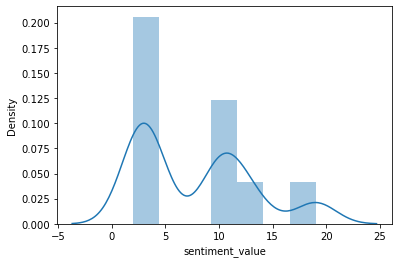

In [171]:
import seaborn as sns
sns.distplot(Review_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

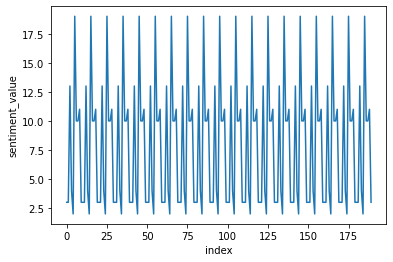

In [172]:
sns.lineplot(y = 'sentiment_value', x = 'index',data = Review_df)